In [1]:
import pickle
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import nibabel as nib
import ants
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation
import cv2
import bigbadbrain as bbb
import scipy
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
import matplotlib
import tqdm
import brainsss

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [2]:
cluster_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20221109_cluster_pca/"

In [3]:
### TEMPORAL NEWEST ### (supercluster version)
# not based on average supercluster signal, but rather averaged filters from supervoxels
temporal_filters_indiv = []
for fly in range(9):
    file = os.path.join(cluster_dir,"20221128_indiv_temporal_filters", F"fly_{fly}.npy")
    temporal_filters_indiv.append(np.load(file))
temporal_filters_indiv = np.asarray(temporal_filters_indiv)
temporal_filters_indiv = np.swapaxes(temporal_filters_indiv,0,1)
temporal_filters_indiv = np.reshape(temporal_filters_indiv,(501,9,4,500))
print(temporal_filters_indiv.shape)

(501, 9, 4, 500)


In [ ]:
### average across flies
temporal_filters = np.mean(temporal_filters_indiv,axis=1)

In [8]:
mean_map = None
filters_in_FDA = None

In [24]:
mean_map.shape, filters_in_FDA.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
mean_map = np.zeros((314, 146, 91, 2000))
maps = []
#supervoxel version
for fly in range(9):
    print('loading...')
    file = F"/scratch/users/brezovec/20221127_indiv_filters_in_FDA/fly_{fly}.npy"
    filters_in_FDA = np.load(file)
    
    mean_map += filters_in_FDA
    
    for beh in [0,1,2]:
        temporal_map = np.argmax(filters_in_FDA[...,500*beh:500*(beh+1)],axis=-1)
        peak_values = np.max(filters_in_FDA[...,:500],axis=-1)
        print('exploding')
        for percentile in [0,60,80,90,95]:
            thresh = np.percentile(peak_values.flatten(),percentile)
            temporal_map[peak_values<thresh] = 0
            
            input_canvas = np.zeros((500,500))

            x_shift=0; y_shift=0
            data_map, contours = plot_grouped_roi_image(FB_group.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            x_shift=0; y_shift=-45
            data_map, contours = plot_grouped_roi_image(PB.keys(), plot=False)
            canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            x_shift=0; y_shift=35
            data_map, contours = plot_grouped_roi_image({23: 'EB'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            ##########
            ### MB ###
            ##########

            # x_shift=60; y_shift=-50
            # data_map, contours = plot_grouped_roi_image(MB_left_group.keys(), plot=False)
            # canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
            # x_shift=-60; y_shift=-50
            # data_map, contours = plot_grouped_roi_image(MB_right_group.keys(), plot=False)
            # canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            #################
            ### BIG GROUP ###
            #################

            x_shift=-130; y_shift=30
            data_map, contours = plot_grouped_roi_image(big_r_group.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
            x_shift=130; y_shift=30
            data_map, contours = plot_grouped_roi_image(big_l_group.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            ##############
            ### VISUAL ###
            ##############

            x_shift=-200; y_shift=175
            data_map, contours = plot_grouped_roi_image({25: 'MED_R'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
            x_shift=200; y_shift=175
            data_map, contours = plot_grouped_roi_image({71: 'MED_L'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            x_shift=-140; y_shift=40+175
            data_map, contours = plot_grouped_roi_image({3: 'LO_R'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
            x_shift=140; y_shift=40+175
            data_map, contours = plot_grouped_roi_image({53: 'LO_L'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            x_shift=-140; y_shift=-30+175
            data_map, contours = plot_grouped_roi_image({22: 'LP_R'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
            x_shift=140; y_shift=-30+175
            data_map, contours = plot_grouped_roi_image({69: 'LP_L'}.keys(), plot=False)
            canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

            canvas = wraper_wraper(canvas, ventromedial_r_group.keys(), y_shift=55, x_shift=-50)
            canvas = wraper_wraper(canvas, ventromedial_l_group.keys(), y_shift=55, x_shift=50)

            canvas = wraper_wraper(canvas, anterior_group.keys(), y_shift=150, x_shift=0)

            canvas = wraper_wraper(canvas, {34: 'AOTU_R'}.keys(), y_shift=-50+175-15, x_shift=-80)
            canvas = wraper_wraper(canvas, {79: 'AOTU_L'}.keys(), y_shift=-50+175-15, x_shift=80)

            canvas[np.where(canvas==0)] = np.nan
            
            maps.append(canvas)
            
    filters_in_FDA = None
    time.sleep(10)

loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding
loading...
exploding
exploding
exploding


In [10]:
maps = np.asarray(maps)
maps.shape

(135, 500, 500)

In [14]:
save_file = os.path.join(cluster_dir, '20221130_indiv_temporal_explosions')
np.save(save_file, maps)

In [13]:
maps = np.reshape(maps,(9,3,5,500,500))

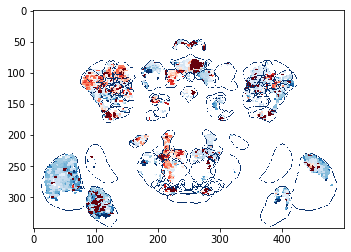

In [39]:
plt.imshow(maps[9][150:,:],cmap=mymap,vmin=end_c,vmax=start_c)

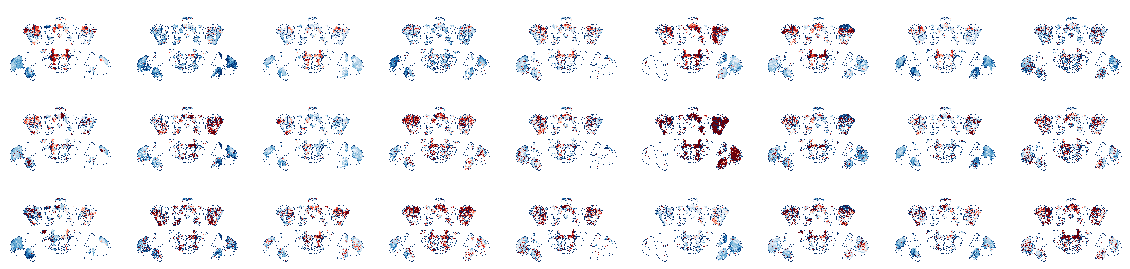

In [15]:
plt.figure(figsize=(20,20))
idx = 0
for beh in range(3):
    for fly in range(9):
        idx+=1
        plt.subplot(3,9,idx)
        plt.imshow(maps[fly,beh,4,150:,:],cmap=mymap,vmin=end_c,vmax=start_c)
        plt.axis('off')
plt.subplots_adjust(hspace=-.9)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=900,bbox_inches='tight')

In [29]:
len(maps)

15

In [12]:
maps[0].shape

(500, 500)

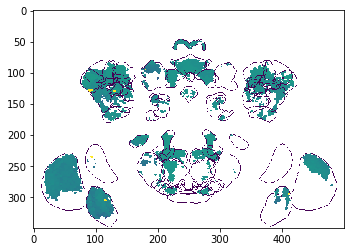

In [30]:
plt.imshow(maps[4][150:,:])

In [5]:
filters_in_FDA.shape

(314, 146, 91, 2000)

In [14]:
temporal_map = np.argmax(filters_in_FDA[...,:500],axis=-1)
peak_values = np.max(filters_in_FDA[...,:500],axis=-1)
#temporal_map.shape

In [27]:
thresh = np.percentile(peak_values.flatten(),80) #top 40% #this includes the background so lets thresh more
temporal_map[peak_values<thresh] = 0

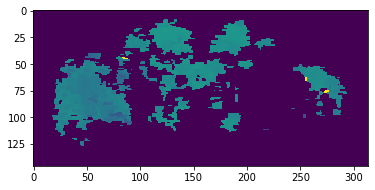

In [28]:
plt.imshow(temporal_map[:,:,50].T)

In [36]:
out = explode()

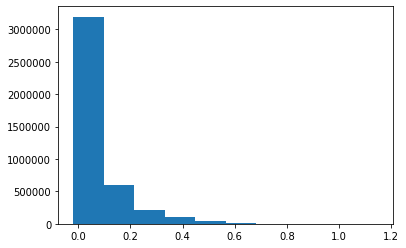

In [15]:
plt.hist(peak_values.flatten());

In [4]:
start_c = 265 ###
end_c = 200 ######## most used
middle_c = 250 ###

# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.Blues_r(np.linspace(0., 1, middle_c-end_c))
colors2 = plt.cm.Reds(np.linspace(0, 1, start_c-middle_c))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [5]:
atlas_clean = brainsss.load_roi_atlas()
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas_clean)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas_clean)

In [6]:
def plot_grouped_roi_image(rois,plot=True):
    roi_data = []
    roi_contours = []

    left_edges = []
    right_edges = []
    bottom_edges = []
    top_edges = []

    for roi in rois:
        ####################
        ### Get roi mask ###
        ####################

        mask = np.zeros(atlas_clean.shape)
        mask[np.where(atlas_clean == roi)] = 1

        mask_eroded = binary_erosion(mask, structure=np.ones((2,2,2)))
        mask_dilated = binary_dilation(mask_eroded, iterations=2)

        # temporal
        masked_roi = mask_dilated*temporal_map #CORR
        masked_roi_flat = np.max(masked_roi,axis=2)
        roi_data.append(masked_roi_flat)
        
        #PCA
#         masked_roi = mask_dilated*pca_map
#         maxs = np.max(masked_roi,axis=2)
#         mins = np.min(masked_roi,axis=2)
#         maxs[np.where(np.abs(mins)>maxs)] = mins[np.where(np.abs(mins)>maxs)]
#         masked_roi_flat = maxs
#         roi_data.append(masked_roi_flat)
    
        #######################
        ### Get roi contour ###
        #######################
        
        _, mask_binary = cv2.threshold(np.max(mask_dilated,axis=-1).astype('uint8'), 0, 1, cv2.THRESH_BINARY) 
        contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#cv2.RETR_TREE

        canvas = np.ones(atlas_clean[:,:,0].shape)
        out = cv2.drawContours(canvas, contours, -1, (0,255,0), 1)
        out = np.abs(out-1) #flip 0/1
        roi_contour = np.repeat(out[:,:,np.newaxis],repeats=4,axis=-1) ### copy into rgba channels to make white
        roi_contours.append(roi_contour)

        # for plotting
        left_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=0)>0)[0][0])
        right_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=0)>0)[0][-1])
        top_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=1)>0)[0][0])
        bottom_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=1)>0)[0][-1])
        
    # get extreme edges from all rois used
    left_edge = np.min(left_edges) - 1
    right_edge = np.max(right_edges) + 1
    top_edge = np.min(top_edges) - 1
    bottom_edge = np.max(bottom_edges) + 1

    ############
    ### PLOT ###
    ############
    
    roi_datas = np.max(np.asarray(roi_data),axis=0)
    data_map = np.swapaxes(roi_datas[top_edge:bottom_edge,left_edge:right_edge],0,1)
    
    #PCA
#     roi_data = np.asarray(roi_data)
#     maxs = np.max(roi_data,axis=0)
#     mins = np.min(roi_data,axis=0)
#     maxs[np.where(np.abs(mins)>maxs)] = mins[np.where(np.abs(mins)>maxs)]
#     data_map = np.swapaxes(maxs[top_edge:bottom_edge,left_edge:right_edge],0,1)

    if plot:
        plt.figure(figsize=(10,10))
        plt.imshow(data_map)

    contours_to_export = []
    for i in range(len(roi_contours)):
        single_contour = np.swapaxes(roi_contours[i][top_edge:bottom_edge,left_edge:right_edge],0,1)
        contours_to_export.append(single_contour)
        if plot:
            plt.imshow(single_contour)
        
    return data_map, contours_to_export

def place_on_canvas(input_canvas, to_plot, is_contour=False, is_midline=True, x_shift=0, y_shift=0):
    full_y_mid = int(input_canvas.shape[0]/2)
    full_x_mid = int(input_canvas.shape[1]/2)

    y_mid = int(to_plot.shape[0]/2)
    x_mid = int(to_plot.shape[1]/2)

    height = to_plot.shape[0]
    width = to_plot.shape[1]

    left = full_x_mid-x_mid
    right = left + width

    top = full_y_mid-y_mid
    bottom = top + height

    if is_contour:
        ys = np.where(to_plot[:,:,0]>0)[0] + full_y_mid - y_mid + y_shift
        xs = np.where(to_plot[:,:,0]>0)[1] + full_x_mid - x_mid + x_shift
        input_canvas[ys,xs]=1
    else:
        #input_canvas[top+y_shift:bottom+y_shift,left+x_shift:right+x_shift,:3] = to_plot
        input_canvas[top+y_shift:bottom+y_shift,left+x_shift:right+x_shift] = to_plot #pca
    return input_canvas

def place_on_canvas_wrapper(canvas, data_map, contours, y_shift, x_shift):
    canvas = place_on_canvas(canvas, to_plot=data_map, y_shift=y_shift, x_shift=x_shift)
    for i in range(len(contours)):
        canvas = place_on_canvas(canvas, to_plot=contours[i], is_contour=True, y_shift=y_shift, x_shift=x_shift)
    return canvas

def wraper_wraper(canvas, roi_ids, y_shift, x_shift):
    data_map, contours = plot_grouped_roi_image(roi_ids, plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    return canvas

In [7]:
##################
### ROI GROUPS ###
##################

FB_group = {
26: 'FB',
4: 'NO',
5: 'BU_R',
54: 'BU_L',
8: 'LAL_R',
56: 'LAL_L',
31: 'PVLP_R',
76: 'PVLP_L'}

ventromedial_r_group = {
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R'}

ventromedial_l_group = {
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L'}

PB = {6: 'PB'}
EB = {23: 'EB'}

anterior_group = {
50: 'PRW',
9: 'SAD',
49: 'GNG',
30: 'AVLP_R',
75: 'AVLP_L',
24: 'AL_R',
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
32: 'IVLP_R',
77: 'IVLP_L',
10: 'CAN_R',
20: 'FLA_R',
57: 'CAN_L',
67: 'FLA_L'}

big_r_group = {
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R'}
    
big_l_group = {
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L'}

In [7]:
#input_canvas = np.zeros((500,500,3))
def explode():

    x_shift=0; y_shift=0
    data_map, contours = plot_grouped_roi_image(FB_group.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    x_shift=0; y_shift=-45
    data_map, contours = plot_grouped_roi_image(PB.keys(), plot=False)
    canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    x_shift=0; y_shift=35
    data_map, contours = plot_grouped_roi_image({23: 'EB'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    ##########
    ### MB ###
    ##########

    # x_shift=60; y_shift=-50
    # data_map, contours = plot_grouped_roi_image(MB_left_group.keys(), plot=False)
    # canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    # x_shift=-60; y_shift=-50
    # data_map, contours = plot_grouped_roi_image(MB_right_group.keys(), plot=False)
    # canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    #################
    ### BIG GROUP ###
    #################

    x_shift=-130; y_shift=30
    data_map, contours = plot_grouped_roi_image(big_r_group.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    x_shift=130; y_shift=30
    data_map, contours = plot_grouped_roi_image(big_l_group.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    ##############
    ### VISUAL ###
    ##############

    x_shift=-200; y_shift=175
    data_map, contours = plot_grouped_roi_image({25: 'MED_R'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    x_shift=200; y_shift=175
    data_map, contours = plot_grouped_roi_image({71: 'MED_L'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    x_shift=-140; y_shift=40+175
    data_map, contours = plot_grouped_roi_image({3: 'LO_R'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    x_shift=140; y_shift=40+175
    data_map, contours = plot_grouped_roi_image({53: 'LO_L'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    x_shift=-140; y_shift=-30+175
    data_map, contours = plot_grouped_roi_image({22: 'LP_R'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    x_shift=140; y_shift=-30+175
    data_map, contours = plot_grouped_roi_image({69: 'LP_L'}.keys(), plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

    canvas = wraper_wraper(canvas, ventromedial_r_group.keys(), y_shift=55, x_shift=-50)
    canvas = wraper_wraper(canvas, ventromedial_l_group.keys(), y_shift=55, x_shift=50)

    canvas = wraper_wraper(canvas, anterior_group.keys(), y_shift=150, x_shift=0)

    canvas = wraper_wraper(canvas, {34: 'AOTU_R'}.keys(), y_shift=-50+175-15, x_shift=-80)
    canvas = wraper_wraper(canvas, {79: 'AOTU_L'}.keys(), y_shift=-50+175-15, x_shift=80)

    canvas[np.where(canvas==0)] = np.nan
    return canvas

#     plt.figure(figsize=(10,10))
#     plt.imshow(canvas[150:,:],cmap=mymap,vmin=end_c,vmax=start_c)
#     plt.axis('off')

#     save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
#     timestr = time.strftime("%Y%m%d-%H%M%S")
#     fname = os.path.join(save_path, f'{timestr}')
#     #plt.savefig(fname,dpi=300,bbox_inches='tight')